In [2]:
import pandas as pd
from pandas_ods_reader import read_ods
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sheetidx = 1
path = "/home/iamchiranjeeb/Desktop/Python/suv.ods"
df = read_ods(path,sheetidx)
df

,User_id,Gender,Age,Est_salary,Purchased
0,1.501289e+09,male,19.0,10000.0,0.0
1,1.601290e+09,male,22.0,12000.0,0.0
2,1.501289e+09,male,34.0,27000.0,0.0
3,1.501231e+09,male,50.0,48000.0,1.0
4,1.401289e+09,female,20.0,13500.0,0.0
5,1.401290e+09,female,22.0,12000.0,0.0
6,1.501290e+09,female,23.0,17000.0,0.0
7,1.501290e+09,male,45.0,45000.0,1.0
8,1.501289e+09,male,27.0,27000.0,0.0
9,1.701289e+09,female,21.0,12000.0,0.0


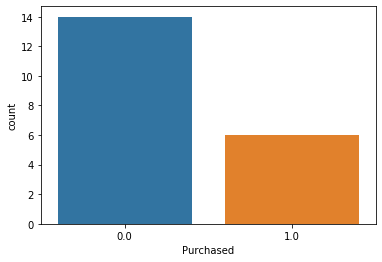

In [3]:
sns.countplot(x="Purchased",data=df)

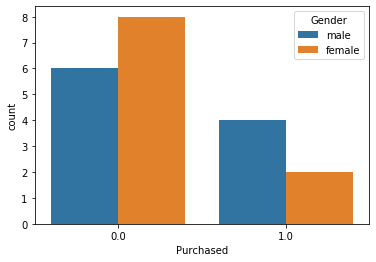

In [4]:
sns.countplot(x="Purchased",hue="Gender",data=df)

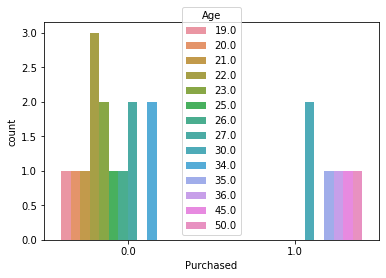

In [5]:
sns.countplot(x="Purchased",hue="Age",data=df)

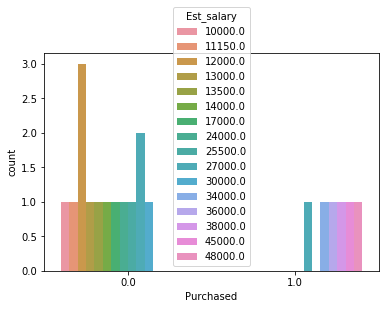

In [6]:
sns.countplot(x="Purchased",hue="Est_salary",data=df)

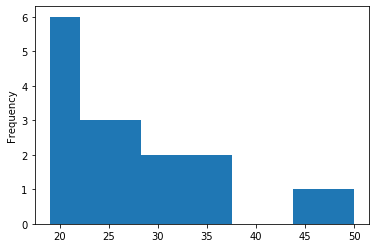

In [7]:
df["Age"].plot.hist()

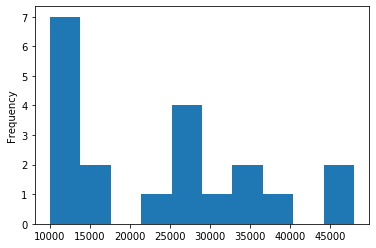

In [8]:
df["Est_salary"].plot.hist()

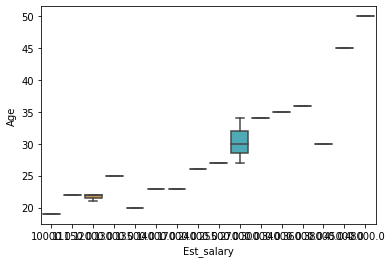

In [9]:
sns.boxplot(x="Est_salary",y="Age",data=df)

# Data Wrangling

In [10]:
pd.get_dummies(df["Gender"])

,female,male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1
9,1,0


In [11]:
sex = pd.get_dummies(df["Gender"],drop_first=True)
sex

,male
0,1
1,1
2,1
3,1
4,0
5,0
6,0
7,1
8,1
9,0


In [12]:
df = pd.concat([df,sex],axis=1)
df

,User_id,Gender,Age,Est_salary,Purchased,male
0,1.501289e+09,male,19.0,10000.0,0.0,1
1,1.601290e+09,male,22.0,12000.0,0.0,1
2,1.501289e+09,male,34.0,27000.0,0.0,1
3,1.501231e+09,male,50.0,48000.0,1.0,1
4,1.401289e+09,female,20.0,13500.0,0.0,0
5,1.401290e+09,female,22.0,12000.0,0.0,0
6,1.501290e+09,female,23.0,17000.0,0.0,0
7,1.501290e+09,male,45.0,45000.0,1.0,1
8,1.501289e+09,male,27.0,27000.0,0.0,1
9,1.701289e+09,female,21.0,12000.0,0.0,0


In [13]:
df=df.drop(['User_id','Gender'],axis=1)
df

,Age,Est_salary,Purchased,male
0,19.0,10000.0,0.0,1
1,22.0,12000.0,0.0,1
2,34.0,27000.0,0.0,1
3,50.0,48000.0,1.0,1
4,20.0,13500.0,0.0,0
5,22.0,12000.0,0.0,0
6,23.0,17000.0,0.0,0
7,45.0,45000.0,1.0,1
8,27.0,27000.0,0.0,1
9,21.0,12000.0,0.0,0


In [14]:
df.head(2)

,Age,Est_salary,Purchased,male
0,19.0,10000.0,0.0,1
1,22.0,12000.0,0.0,1


# Train Data

In [15]:
X=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0)

In [18]:
X_train

,Age,Est_salary,male
4,20.0,13500.0,0
2,34.0,27000.0,1
5,22.0,12000.0,0
14,34.0,30000.0,1
9,21.0,12000.0,0
7,45.0,45000.0,1
16,36.0,36000.0,1
11,27.0,25500.0,0
3,50.0,48000.0,1
0,19.0,10000.0,1


In [19]:
X_test

,Age,Est_salary,male
18,25.0,13000.0,0
1,22.0,12000.0,1
19,30.0,38000.0,0
8,27.0,27000.0,1
10,30.0,27000.0,0
17,22.0,11150.0,0
6,23.0,17000.0,0
13,26.0,24000.0,0


In [20]:
y_train

4     0.0
2     0.0
5     0.0
14    0.0
9     0.0
7     1.0
16    1.0
11    0.0
3     1.0
0     0.0
15    1.0
12    0.0
Name: Purchased, dtype: float64

In [21]:
y_test

18    0.0
1     0.0
19    1.0
8     0.0
10    1.0
17    0.0
6     0.0
13    0.0
Name: Purchased, dtype: float64

In [22]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(solver='lbfgs')

In [26]:
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
prediction = model.predict(X_test)
prediction

array([0., 0., 1., 1., 0., 0., 0., 0.])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(y_test,prediction)

array([[5, 1],
       [1, 1]])

In [30]:
from sklearn.metrics import accuracy_score


In [31]:
accuracy_score(y_test,prediction)

0.75